# **Song Popularity Analysis and Prediction**

**Nikheil Lal Malakar:** 45674922

**Gordon Chong Ren Ong:** 45552495 

**Tracey Truong:** 44971079

**Vo Tuyet Trinh Nguyen:** 44190530



## Summary
At the end of each year, Spotify compiles a playlist of the 100 most streamed songs over the course of the year. In this project, we will analyse the audio attributes of 247,000 songs from Spotify to retrieve any interesting observations, compare that with the Top Spotify Tracks of 2018, and use those findings to predict the popularity of other songs.

## Description
We will conduct a low-level audio analysis for all the songs in the dataset below. There are 131,000 songs for the year 2019 and 116,000 songs for 2018. Each song has metadata that describes the song’s structure and musical content such as acousticness, danceability, duration, energy, instrumentals, key, liveness, loudness, etc. We will extract the “popularity” score of each song and use that in our analysis to determine if there is any correlation between a song’s audio attributes and its associated popularity.

## What makes a song popular?
We will answer that by using the world's most popular music streaming application Spotify where they have more than 30 million songs. However, in this case we will be experimenting on 240,000 song data.

## How do we define Popularity?
**Definition on Spotify**: 
The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.

Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.


# **Data Collection Method (Data Preparation)**
We first start by making a Spotify Premium account which will give us access to the [Web API](https://developer.spotify.com/documentation/web-api/). Then we make a token which will give us access to the API for collecting data. The token is private to prevent use by external parties and sharing is not allowed.

In [0]:
import numpy as np 
import pandas as pd 
import os 
import sys 
import requests
import json
import datetime
import time
from pandas.io.json import json_normalize

We have imported everything we needed here. We proceed by getting the track IDs where all the tracks are kept in order for us to collect them.

In [0]:
Data = pd.read_csv('Tracks.csv')
#Drop Unwanted column called Unnamed
Data = Data.drop('Unnamed: 0', axis = 1)

This returns all the neccessary columns:

In [0]:
def getOneLine(id):
    token = 'YOUR TOKEN'
    myID = 'YOUR ID'
    
    headers = {
    'Accept': 'application/json',
    'response_type': 'code',
    'Authorization': 'Get your own key'
    }
    
    url = 'https://api.spotify.com/v1/audio-features/' + id
    response = requests.get(url, allow_redirects = True, headers=headers)
    #print(response)
    response = str(response.json())
    
    response = response.replace('{','')
    response = response.replace(',','')
    response = response.replace("'","")
    response = response.split()
    
    danceAbility = response[1]
    energy = response[3]
    key = response[5]
    loudness = response[7]
    mode = response[9]
    speechiness = response[11]
    acousticness = response[13]
    instrumentalness = response[15]
    liveness = response[17]
    valence = response[19]
    tempo = response[21]
    time_signature = response[35][0]
    duration_ms = response[33]

    return danceAbility, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, duration_ms

This returns the popularity of the song:

In [0]:
def getTrackPlayedNum(id):
    headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': 'Get your own key'
    }
    
    response = requests.get('https://api.spotify.com/v1/tracks/' + id, headers=headers)
    #print(response)
    response = str(response.json())
    
    #Replace everything
    response = response.replace('{','')
    response = response.replace(',','')
    response = response.replace("'","")
    response = response.split()
    
    popularityIndex = response.index('popularity:')
    return response[popularityIndex + 1]

This loops through the CSV file and collects the URI IDs which will be sent on a GET request to the WEB API in order to retrieve the popularity score and the songs:

In [0]:
def makeDatasets():
    #df = pd.DataFrame(columns=['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'popularity'])
    df = pd.read_csv('Datasets/Data.csv')
    #For loop Start
    for i in range(Data.shape[0]):
        print(i)
        ID = Data.iloc[i]['track_id']
        danceAbility, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, duration_ms = getOneLine(ID)
        popularity = getTrackPlayedNum(ID)
        df = df.append({
            'artist_name' : Data.iloc[i]['artist_name'], 
            'track_id' : ID, 
            'track_name': Data.iloc[i]['track_name'], 
            'acousticness': acousticness, 
            'danceability': danceAbility, 
            'duration_ms': duration_ms, 
            'energy': energy, 
            'instrumentalness': instrumentalness, 
            'key': key, 
            'liveness': liveness, 
            'loudness': loudness, 
            'mode': mode, 
            'speechiness': speechiness, 
            'tempo': tempo, 
            'time_signature': time_signature, 
            'valence': valence, 
            'popularity': popularity,
        }, ignore_index = True)
        
        if i % 500 == 0:
            print(df.head())
            print(df.shape)
            df.to_csv('Data.csv')

makeDatasets()

# **Dataset Explanation via Spotify**

* **Duration** : The duration of the track in milliseconds.
* **Key**      : The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* **mode**     : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* **time_signature** : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* **acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
* **danceability** : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
* **energy**       : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* **instrumentalness** : Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* **liveness** : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **loudness** : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* **speechiness** : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* **valence** : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 
* **tempo** : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


## Importing everything required

In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#Models
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import Ridge

#Feature Selection
from sklearn.feature_selection import RFE

#Mean squared Error
from sklearn.cluster import KMeans

#Cross Validation
from sklearn.model_selection import cross_val_score

%matplotlib inline

#Only Colab
import io
import os

In [0]:
#Import Tensorflow
!pip install Tensorflow
import tensorflow as tf 

In [0]:
#Remove Warning
import warnings
warnings.filterwarnings('ignore')

# **Preparing Dataset**

### **Requirement 2**

This process is collecting data from spotify WEB API and requires good internet connection and plenty of time. Please get your won toke, ID and other items to complete the data gathering technique used here.

Only Colab from here:


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### This notebook is shared and completed via google colab which uses ipynb therefore needs special data reading commands. Please follow the Jupyter Notebook command in order to run the reading of the data.

In [0]:
#For Jupyter Notebook
df = pd.read_csv('Data.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
print(df.shape)

In [0]:
#For Google Colab Nikheil
df = pd.read_csv('/content/gdrive/My Drive/COMP257/Project/Data.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
print(df.shape)

In [0]:
#For Google Colab Gordon
df = pd.read_csv('/content/gdrive/My Drive/dataset/Data.csv')
df = df.drop(['Unnamed: 0'], axis = 1)

In [0]:
df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,9
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,8


In [0]:
df.tail()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
247030,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.00678,0.601,190539,0.801,0.0,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
247031,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.91800,0.387,194583,0.249,0.0,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
247032,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.33000,0.717,139191,0.532,0.0,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
247033,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.00790,0.772,180013,0.510,0.0,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50
247034,Banda Los Sebastianes,7LNtyuekYHiZ99UxkrfCQR,En Vida,0.54900,0.715,145827,0.734,0.0,3,0.1080,-3.244,1,0.0367,130.128,3,0.9760,55


In [0]:
print('Shape of the CSV is: ', df.shape)
print('Number of rows : ', df.shape[0])
print('Number of Columns : ', df.shape[1])

Shape of the CSV is:  (247035, 17)
Number of rows :  247035
Number of Columns :  17


# **Analysis (Data Exploration)**

### **Requirement 5**

* We will be using the dataset that we've retrieved through our WEB API and use visualising methods to understand the data and its relationships. It is highly probable that there will be little to no relationship evident due to the data complexity.

* For Python we will be using Mat Plot Library, Seaborn Library and Pandas Visualisation techniques to explore the data we have retrieved. Due to the size of the dataset we will need to take a sample instead of plotting the entire dataset.

* First, we will start with the plotting a scatterplot matrix of the dataset using Seaborn Library.

In [0]:
plot = sns.pairplot(df)
print(plot)

Output hidden; open in https://colab.research.google.com to view.

* From the scatterplot matrix above, it is difficult to tell whether or not there is a relationship between any of the predictors and Popularity - there is either no obvious relationship or heteroscedasticity is present. 

* All of the predictors have a skewed distribution meaning the data is not from a normal distribution.

* Heteroscedasticity of error terms means our model's ability to predict Popularity may be inconsistent.

Second, to plot individual columns we will need to take a smaller sample of the dataset because the dataset has over 240,000 rows. We will take a sample of 240,000/100, which is 1% of the dataset and plot it which will save us time and processing power.

In [0]:
#Get All Columns
columns = list(df.columns.values)[4:]
print(columns)
#Get a Sample
dfSample1 = df.sample(n = int(df.shape[0]/100), random_state = 1)
dfSample2 = df.sample(n = int(df.shape[0]/100), random_state = 1)

['danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']


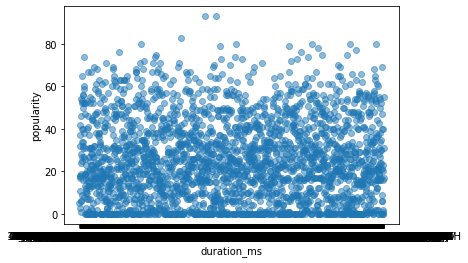

In [0]:
num = 1
plt.xlabel(columns[num])
plt.ylabel('popularity')
plt.scatter(dfSample1.iloc[:,num], dfSample1.iloc[:,16], alpha=0.5)
plt.show()

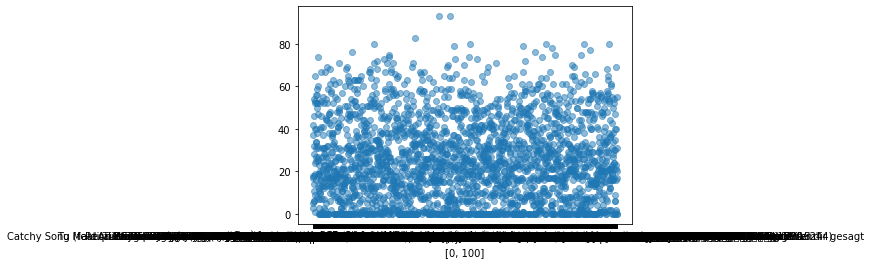

In [0]:
num = 2
plt.xlabel([0, 100])
plt.ylabel('popularity')
plt.scatter(dfSample1.iloc[:,num], dfSample1.iloc[:,16], alpha=0.5)

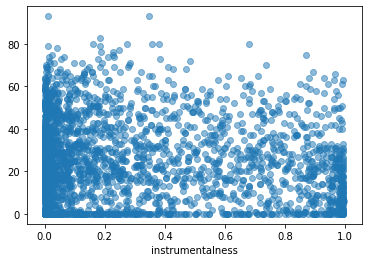

In [0]:
num = 3
plt.xlabel(columns[num])
plt.ylabel('popularity')
plt.scatter(dfSample1.iloc[:,num], dfSample1.iloc[:,16], alpha=0.5)

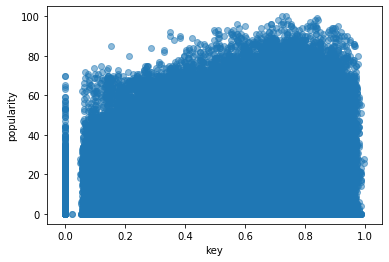

In [0]:
num = 4
plt.xlabel(columns[num])
plt.ylabel(columns[12])
plt.scatter(df.iloc[:,num], df.iloc[:,16], alpha=0.5)

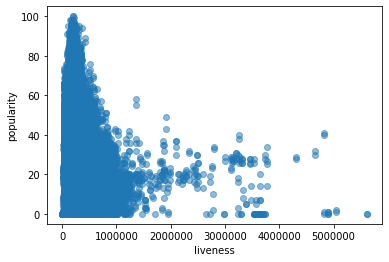

In [0]:
num = 5
plt.xlabel(columns[num])
plt.ylabel(columns[12])
plt.scatter(df.iloc[:,num], df.iloc[:,16], alpha=0.5)

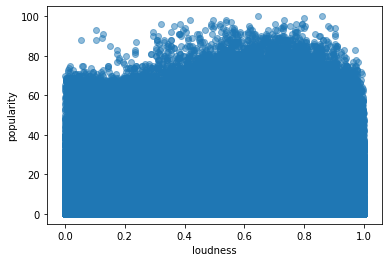

In [0]:
num = 6
plt.xlabel(columns[num])
plt.ylabel(columns[12])
plt.scatter(df.iloc[:,num], df.iloc[:,16], alpha=0.5)

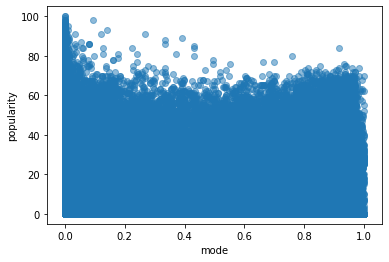

In [0]:
num = 7
plt.xlabel(columns[num])
plt.ylabel(columns[12])
plt.scatter(df.iloc[:,num], df.iloc[:,16], alpha=0.5)

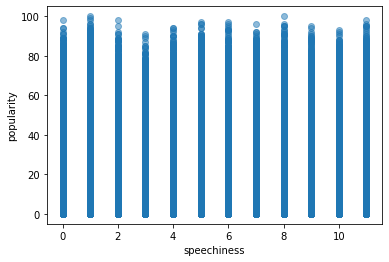

In [0]:
num = 8
plt.xlabel(columns[num])
plt.ylabel(columns[12])
plt.scatter(df.iloc[:,num], df.iloc[:,16], alpha=0.5)

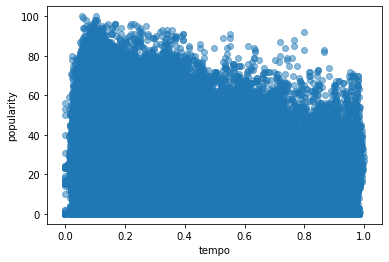

In [0]:
num = 9
plt.xlabel(columns[num])
plt.ylabel(columns[12])
plt.scatter(df.iloc[:,num], df.iloc[:,16], alpha=0.5)

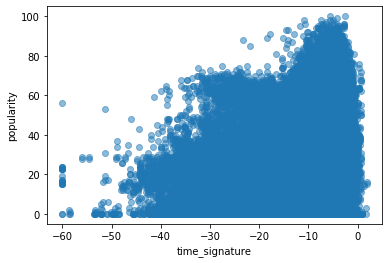

In [0]:
num = 10
plt.xlabel(columns[num])
plt.ylabel(columns[12])
plt.scatter(df.iloc[:,num], df.iloc[:,16], alpha=0.5)

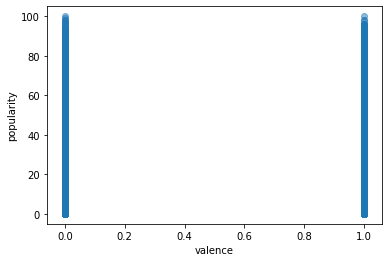

In [0]:
num = 11
plt.xlabel(columns[num])
plt.ylabel(columns[12])
plt.scatter(df.iloc[:,num], df.iloc[:,16], alpha=0.5)

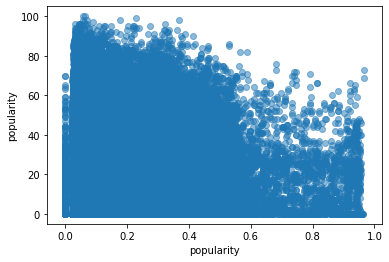

In [0]:
num = 12
plt.xlabel(columns[num])
plt.ylabel(columns[12])
plt.scatter(df.iloc[:,num], df.iloc[:,16], alpha=0.5)

From the plots above, we can see that none of the predictors have a significant relationship with Popularity - there is either no obvious relationship or heteroscadisticity is present.

## Heatmap Analysis

**Why use HeatMap?**

For the Heatmap, we will be checking the magnitude of the relationship between all columns and Popularity.

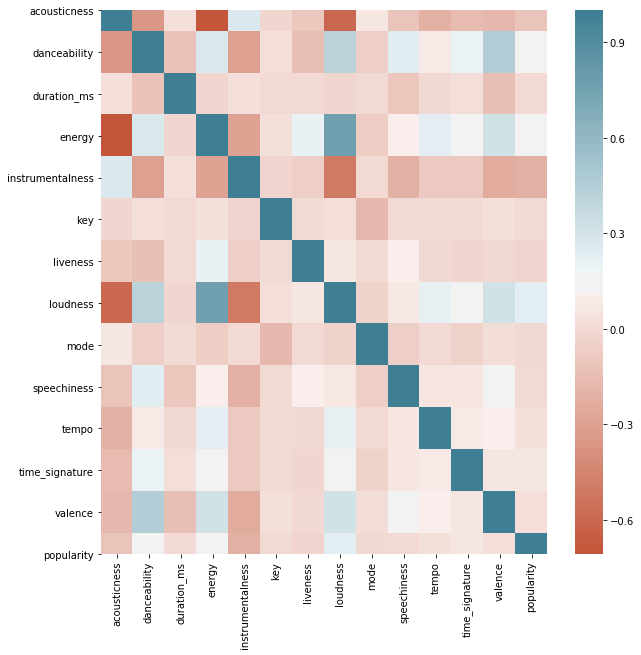

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200))

**Heatmap Conclusion**: 

* In the heatmap above, blue indicates a positive correlation and red indicates a negative correlation. The stronger the colour, the larger the correlation magnitude.

* For the Popularity column, predictors with the strongest colours are loudness, energy and dancability. These predictors have small and positive correlations with Popularity, ranging from 0.1 to 0.3.

* Acousticness, duration_ms, instrumentalness, livenes and speechiness also has strong colours but these predictors have a negative correlation with Popularity since the colour is red. These predictors have correlations ranging from -0.1 to -0.3.


## Top Artist Artists
**Below are artists with the most hits in the top 100 popularity range:**


<BarContainer object of 25 artists>

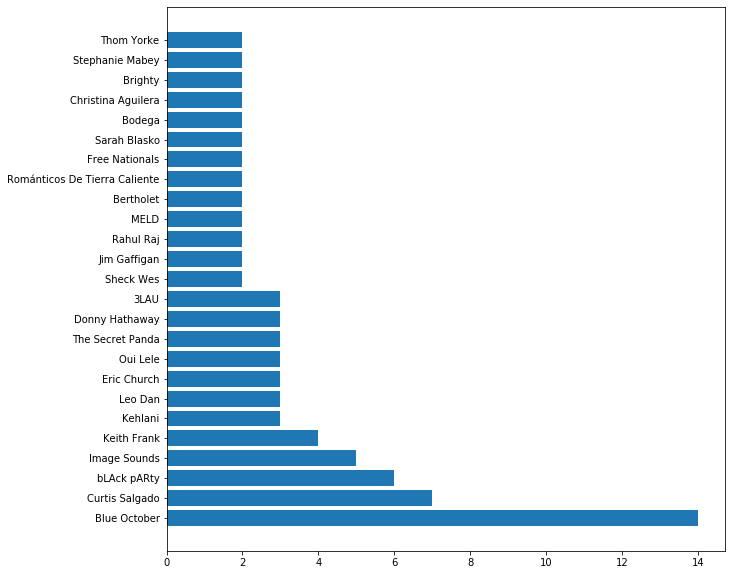

In [0]:
#get top 100 songs
plt.figure(figsize=(10,10))
popularitySortedDF = df
popularitySortedDF.sort_values('popularity')
top100Songs = popularitySortedDF.head(1000)

plt.barh(top100Songs['artist_name'].head(25), top100Songs['artist_name'].value_counts().head(25))

## Exploring Different Modes
There are two types of modes of 0 or 1 which is Mayores or Menores.

In [0]:
Ma = df[df['mode']==1]
Me = df[df['mode']==0]

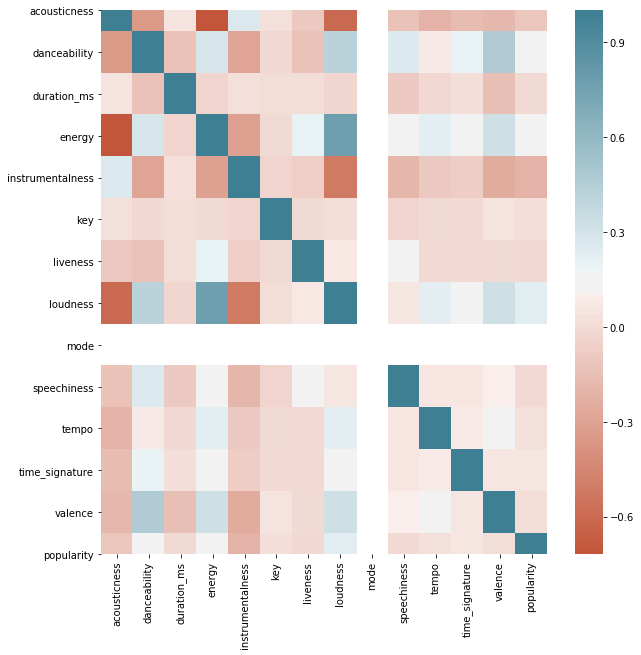

In [0]:
#Plot the two in a heatmap
#Plot for Mayores
plt.figure(figsize=(10,10))
sns.heatmap(Ma.corr(), cmap=sns.diverging_palette(20, 220, n=200))

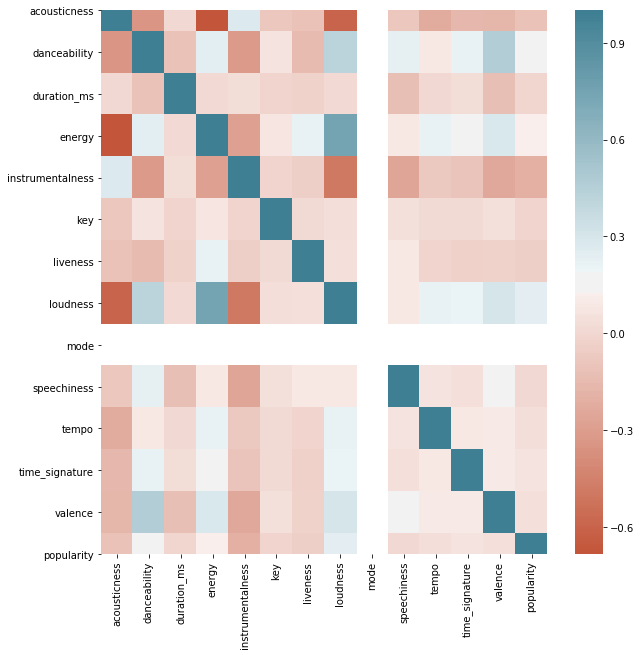

In [0]:
#Plot for Menores
plt.figure(figsize=(10,10))
sns.heatmap(Me.corr(), cmap=sns.diverging_palette(20, 220, n=200))

**Different Modes Exploration Results:** There is no difference between the difference of modes.

## Checking the correlation between the predictors with the strongest correlation magnitude

* We saw from above that the following predictors have a strong/negative correlation with Popularity - loudness, energy, dancability, acousticness, duration_ms, instrumentalness, livenes and speechiness.

* We will now examine these predictors further to see the magnitude of the correlation between these predictors and Popularity.

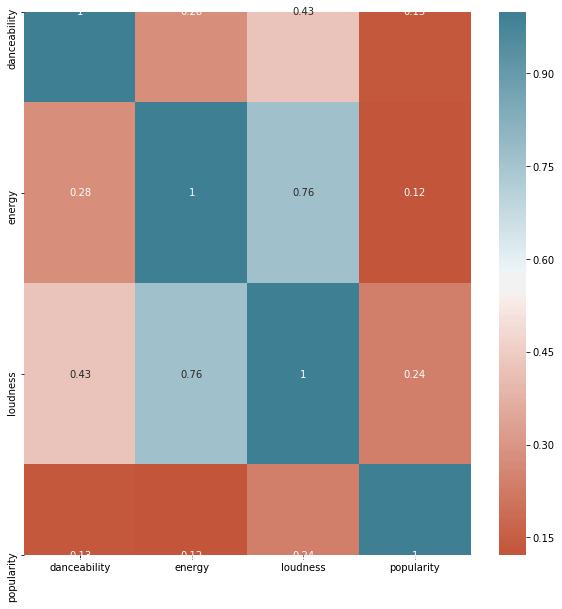

In [0]:
corrDf = df[['danceability', 'energy', 'loudness', 'popularity']]
plt.figure(figsize=(10,10))
sns.heatmap(corrDf.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200))

**Strongest correlations conclusion:** 

* We found that the predictor with the strongest correlation with popularity is loudness (0.24).

* From the heatmaps, we can see that there is no significant relationship between Popularity and all the predictors.

* We saw that predictors with the strongest positive correlation magnitude were loudness and energy. This could suggest that songs with high popularity scores are more upbeat and loud. 

* Predictors with the strongest negative correlation were acousticness, duration_ms, instrumentalness, liveness and speechiness. This could suggest that acoustic songs, instrumental songs and songs with noise in the background aren't as popular.

* However the values of these correlations were very small and close to 0 - the strongest correlation was loudness with a value of 0.24. This suggests that although these audio attributes have strong correlations with Popularity compared to other attributes, they are not very good predictors of Popularity.

* We will continue to investigate this further.

# **Start Training**

### **Requirement 3**


We are going to train the Scikit Learn model using SkLearn.
Before we start training we will split the data into 75% train and 25% test.

In [0]:
data = df[list(df.columns.values)[3:16]]
print(data.columns.values)
target = df[['popularity']]
trainX, testX, trainY, testY = train_test_split(data, target, train_size = 0.75, random_state = 1)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

['acousticness' 'danceability' 'duration_ms' 'energy' 'instrumentalness'
 'key' 'liveness' 'loudness' 'mode' 'speechiness' 'tempo' 'time_signature'
 'valence']
(185276, 13) (61759, 13) (185276, 1) (61759, 1)


## Regression Training
We will now train a Regression Model from SkLearn. Even though we won't see any results with Linear Regression we will try anyway and see the score of the result.

In [0]:
regModel = linear_model.LinearRegression()

In [0]:
#Fit the Model
regModel.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#saving MSE and R2 score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
linearmse = []
linearr2 = []
predict_train_linear= regModel.predict(trainX)
print(np.sqrt(mean_squared_error(trainY,predict_train_linear)))
print(r2_score(trainY, predict_train_linear))
linearmse.append(np.sqrt(mean_squared_error(trainY,predict_train_linear)))
linearr2.append(r2_score(trainY, predict_train_linear))
pred_test_linear= regModel.predict(testX)
print(np.sqrt(mean_squared_error(testY,pred_test_linear))) 
print(r2_score(testY, pred_test_linear))
linearmse.append(np.sqrt(mean_squared_error(testY,pred_test_linear)))
linearr2.append((r2_score(testY, pred_test_linear)))

18.08106676495839
0.0827943246668601
18.14454729163879
0.08232421938305678


Text(0.5, 1.0, 'MSE Linear Regression')

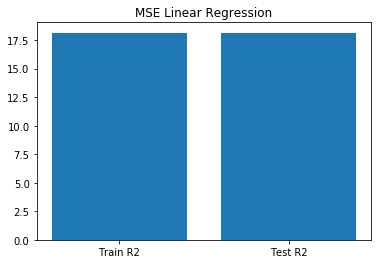

In [0]:
Values = ['Train R2','Test R2']
plt.bar(Values,linearmse)
plt.title('MSE Linear Regression')

Text(0.5, 1.0, 'R2 Linear Regression')

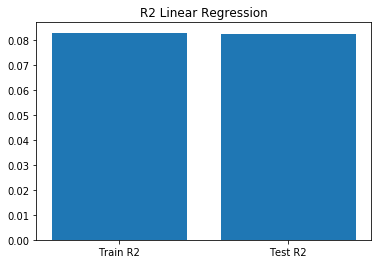

In [0]:
Values = ['Train R2','Test R2']
plt.bar(Values,linearr2)
plt.title('R2 Linear Regression')

In [0]:
#Check the Model
regModel.score(testX, testY)

0.08232421938305678

## Logisctic Regression Training
We will start training a classification type regression.

In [0]:
logModel = linear_model.LogisticRegression()

In [0]:
logModel.fit(trainX, trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logmse = []
logr2 = []
predict_train_log= logModel.predict(trainX)
print(np.sqrt(mean_squared_error(trainY,predict_train_log)))
print(r2_score(trainY, predict_train_log))
logmse.append(np.sqrt(mean_squared_error(trainY,predict_train_log)))
logr2.append(r2_score(trainY, predict_train_log))
pred_test_log= logModel.predict(testX)
print(np.sqrt(mean_squared_error(testY,pred_test_log))) 
print(r2_score(testY, pred_test_log))
logmse.append(np.sqrt(mean_squared_error(testY,pred_test_log)))
logr2.append((r2_score(testY, pred_test_log)))

30.678765830059586
-1.6405500434570732
30.80550589287496
-1.6451705962710248


In [0]:
logModel.score(testX, testY)

0.12101879887951554

Text(0.5, 1.0, 'MSE logistic Regression')

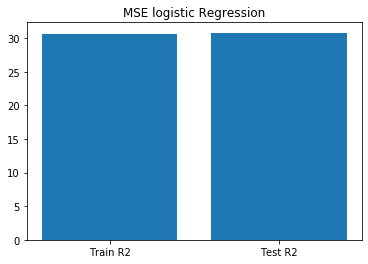

In [0]:
Values = ['Train R2','Test R2']
plt.bar(Values,logmse)
plt.title('MSE logistic Regression')

Text(0.5, 1.0, 'R2 logistic Regression')

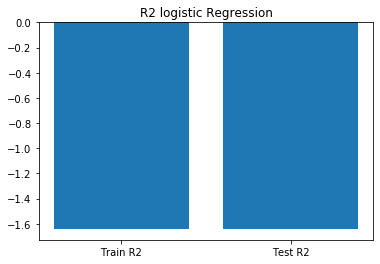

In [0]:
Values = ['Train R2','Test R2']
plt.bar(Values,logr2)
plt.title('R2 logistic Regression')

We can see that the accuracy from Logistic Regression is low and is only 12%. This model is unsuitable as the data is unsuitable for this model to predict.

# **What is going wrong?**

### **Requirement 4**

![MAP](https://scikit-learn.org/stable/_static/ml_map.png)
Using the image above, we need to select a model to use. Here we are predicting the popularity of a song which is a score between 0 and 100. However, is popularity a quantitative or catergorical variable? 
<br>
<br>
We will look into regression and classification.


**Q:** More than 100K samples<br>
**A:** Yes<br>
**Q:** Few features should be important<br>
**A:** Yes<br>
<br>
Model to be trained: **Lasso and Elastic Net**

**Q:** More than 100K samples<br>
**A:** Yes<br>
**Q:** Text Data?<br>
**A:** No<br>
<br>
Model to be trained: **Linear SVC**, KNeighbors Classifier, SVC using Ensemble Classifiers

## Ridge Regression

![alt text](https://miro.medium.com/max/1948/1*P5Lq5mAi4WAch7oIeiS3WA.png)

In [0]:
#Ridge Regression model
ridge = []
ridger2=[]
from sklearn.linear_model import Ridge
from sklearn import metrics
rr = Ridge(alpha=0.01)
rr.fit(trainX, trainY) 
pred_train_rr= rr.predict(trainX)
#train data
print(np.sqrt(metrics.mean_squared_error(trainY,pred_train_rr)))
print(metrics.r2_score(trainY, pred_train_rr))
ridge.append(np.sqrt(metrics.mean_squared_error(trainY,pred_train_rr)))
ridger2.append(metrics.r2_score(trainY, pred_train_rr))
#test data
pred_test_rr= rr.predict(testX)
print(np.sqrt(metrics.mean_squared_error(testY,pred_test_rr))) 
print(metrics.r2_score(testY, pred_test_rr))
ridge.append(np.sqrt(metrics.mean_squared_error(testY,pred_test_rr)))
ridger2.append(metrics.r2_score(testY, pred_test_rr))


18.081066764958994
0.0827943246667987
18.14454727560974
0.0823242210044225


Text(0.5, 1.0, 'MSE Ridge Regression')

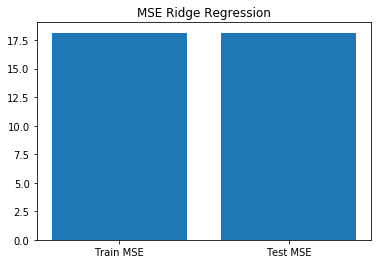

In [0]:
Values = ['Train MSE','Test MSE']
plt.bar(Values,ridge)
plt.title('MSE Ridge Regression')

Text(0.5, 1.0, 'R2 Ridge Regression')

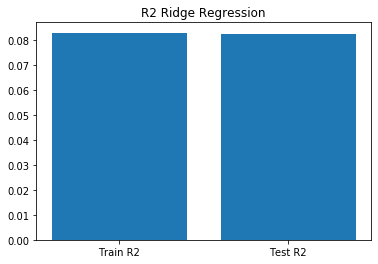

In [0]:
Values = ['Train R2','Test R2']
plt.bar(Values,ridger2)
plt.title('R2 Ridge Regression')

In [0]:
rr.score(testX, testY)

0.0823242210044225

* The above output shows that the RMSE and R-squared values for the Ridge Regression model on the training data is 18.0810 and 8.279%, respectively.

* For the test data, the result for these metrics is 18.14445 and 8.2324%, respectively.

## Lasso Model Training

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/2904b78ec712617fdef0bd35e28442b9c1b35b03)

In [0]:
lassoModel = linear_model.Lasso(alpha=0.01)

In [0]:
#Fit the Model
lassoModel.fit(trainX, trainY)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lassomse = []
lassor2 = []
predict_train_lasso= lassoModel.predict(trainX)
print(np.sqrt(mean_squared_error(trainY,predict_train_lasso)))
print(r2_score(trainY, predict_train_lasso))
lassomse.append(np.sqrt(mean_squared_error(trainY,predict_train_lasso)))
lassor2.append(r2_score(trainY, predict_train_lasso))
pred_test_lasso= lassoModel.predict(testX)
print(np.sqrt(mean_squared_error(testY,pred_test_lasso))) 
print(r2_score(testY, pred_test_lasso))
lassomse.append(np.sqrt(mean_squared_error(testY,pred_test_lasso)))
lassor2.append((r2_score(testY, pred_test_lasso)))

18.08170755997159
0.08272931177295584
18.144976702895413
0.08228078319622534


In [0]:
lassoModel.score(testX, testY)

0.08228078319622534

Text(0.5, 1.0, 'MSE Lasso Regression')

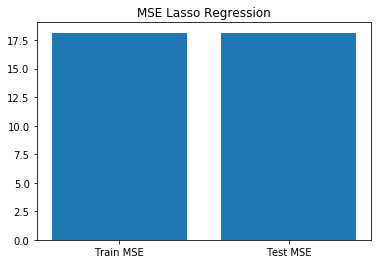

In [0]:
Values = ['Train MSE','Test MSE']
plt.bar(Values,lassomse)
plt.title('MSE Lasso Regression')

Text(0.5, 1.0, 'R2 Lasso Regression')

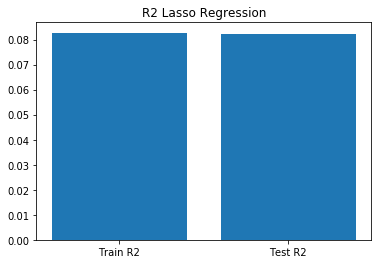

In [0]:
Values = ['Train R2','Test R2']
plt.bar(Values,lassor2)
plt.title('R2 Lasso Regression')

* The above output shows that the RMSE and R-squared values for the Lasso Regression model on the training data is 18.08170 and 8.2729%, respectively.

* The results for these metrics on the test data is 18.1449 and 8.2280%, respectively. 

## Elastic Net Model Training

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/a66c7bfcf201d515eb71dd0aed5c8553ce990b6e)

In [0]:
elasticModel = linear_model.ElasticNet(random_state=1)

In [0]:
elasticModel.fit(trainX, trainY)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
elasrme = []
elasr2 =[]
pred_train_enet= elasticModel.predict(trainX)
print(np.sqrt(mean_squared_error(trainY,pred_train_enet)))
print(r2_score(trainY, pred_train_enet))
elasrme.append(np.sqrt(mean_squared_error(trainY,pred_train_enet)))
elasr2.append(r2_score(trainY, pred_train_enet))
pred_test_enet= elasticModel.predict(testX)
print(np.sqrt(mean_squared_error(testY,pred_test_enet)))
print(r2_score(testY, pred_test_enet))
elasrme.append(np.sqrt(mean_squared_error(testY,pred_test_enet)))
elasr2.append(r2_score(testY, pred_test_enet))

18.31733694809681
0.05866695994748561
18.37979922501458
0.05837382596759666


In [0]:
elasticModel.score(testX, testY)

0.05837382596759666

Text(0.5, 1.0, 'MSE Elastic Regression')

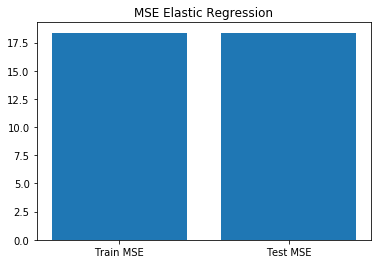

In [0]:
Values = ['Train MSE','Test MSE']
plt.bar(Values,elasrme)
plt.title('MSE Elastic Regression')

Text(0.5, 1.0, 'R2 Elastic Regression')

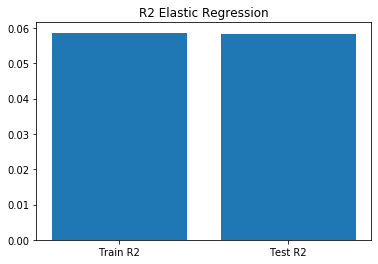

In [0]:
Values = ['Train R2','Test R2']
plt.bar(Values,elasr2)
plt.title('R2 Elastic Regression')

* The above output shows that the RMSE and R-squared value for the ElasticNet Regression model on the training data is 18.31 and 0.05866 %, respectively.

* The results for these metrics on the test data is 18.379 and 5.837%, respectively.

* Judging by the test RSME and R2 scores, the ElasticNet Regression model is performing the worst while the linear regression model is performing the best amongst linear, ridge, lasso, elastic.

* We can say that linear regression is currently the best performing model to predict popularity, although the R2 score is low and RSME score is high among all the different models.

## Linear SVC Model Training

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/579f80b069f186f5a0013b11f90f32833ff8c681)

In [0]:
linearSVCModel = LinearSVC()

In [0]:
linearSVCModel.fit(trainX, trainY)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
linearSVCModel.score(testX, testY)

0.12148836606810344

## K Neighbors Classifier Model Training

![alt text](https://www.saedsayad.com/images/KNN_similarity.png)

In [0]:
KNeighborsModel = KNeighborsClassifier()

In [0]:
KNeighborsModel.fit(trainX, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
KNeighborsModel.score(testX, testY)

0.06829773798150877

# **RFE Analysis**
As we have analysed that danceability, energy and loudness have the most relationship compared to popularity. RFE is a feature selection method that removes and fits the model and eliminates the weakest feature.

In [0]:
#Linear Regression Model RFE Analysis
linearRFE = RFE(linear_model.LinearRegression(), 3)
linearRFE.fit(trainX, trainY)
linearRFE.score(testX, testY)

0.05450675968870732

In [0]:
scores = []
for i in range(1,14):
    linearRFE = RFE(linear_model.LinearRegression(), i)
    linearRFE.fit(trainX, trainY)
    linearRFE.score(testX, testY) 
    scores.append(1 - linearRFE.score(testX,testY))

Text(0.5, 1.0, 'RFE Linear Regression')

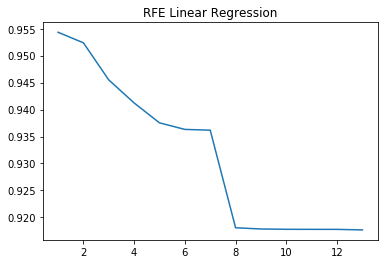

In [0]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13],scores)
plt.title('RFE Linear Regression')

In [0]:
#Ridge Regression RFE model Analysis
ridgeRFE =RFE(Ridge(alpha=0.01),3)
ridgeRFE.fit(trainX, trainY)
ridgeRFE.score(testX, testY)

0.05450676181304238

In [0]:
scoresridge = []
for i in range(1,14):
    ridgeRFE = RFE(Ridge(alpha=0.01),i)
    ridgeRFE.fit(trainX, trainY)
    ridgeRFE.score(testX, testY) 
    scoresridge.append(1 - ridgeRFE.score(testX,testY))

Text(0.5, 1.0, 'RFE Ridge Regression')

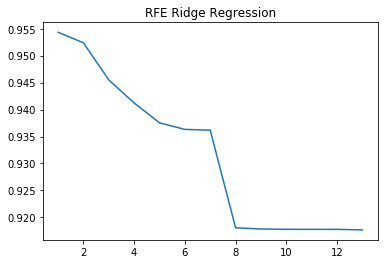

In [0]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13],scoresridge)
plt.title('RFE Ridge Regression')

In [0]:
scoreslog = []
for i in range(1,14):
    logRFE = RFE(linear_model.LogisticRegression(), i)
    logRFE.fit(trainX, trainY)
    logRFE.score(testX, testY)
    scoreslog.append(1 - logRFE.score(testX, testY))

Text(0.5, 1.0, 'RMSE PLOT')

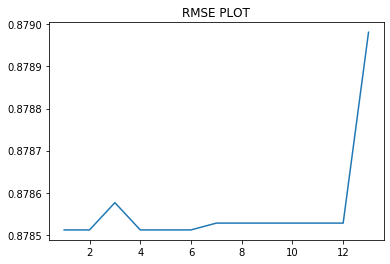

In [0]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13],scoreslog)
plt.title('RFE Logistic Regression')

In [0]:
scoreslasso = []
for i in range(1,14):
    lassoRFE = RFE(linear_model.Lasso(alpha=0), i)
    lassoRFE.fit(trainX, trainY)
    lassoRFE.score(testX, testY)
    scoreslasso.append(1 - lassoRFE.score(testX, testY))

Text(0.5, 1.0, 'RFE Lasso Regression')

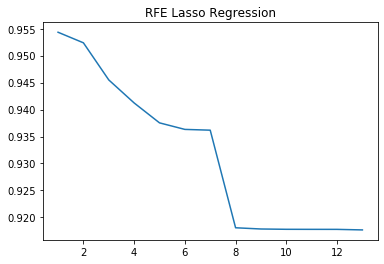

In [0]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13],scoreslasso)
plt.title('RFE Lasso Regression')

In [0]:
scoreselastic = []
for i in range(1,14):
    elasticRFE = RFE(linear_model.ElasticNet(random_state=1), i)
    elasticRFE.fit(trainX, trainY)
    elasticRFE.score(testX, testY)
    scoreselastic.append(1 - elasticRFE.score(testX, testY))

Text(0.5, 1.0, 'RFE Elastic Regression')

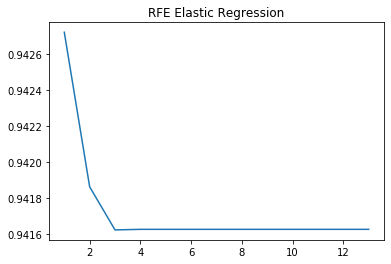

In [0]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13],scoreselastic)
plt.title('RFE Elastic Regression')

# **Categorical method of predicting Popularity**
We will convert Popularity scores to the following categories:
*  0 - 10 percent to 0
* 10 - 20 percent to 1
* 20 - 30 percent to 2
* 30 - 40 percent to 3
* 40 - 50 percent to 4
* 50 - 60 percent to 5
* 60 - 70 percent to 6
* 70 - 80 percent to 7
* 80 - 90 percent to 8
* 90 - 100 percent to 9


In [0]:
catDF = pd.read_csv('/content/gdrive/My Drive/COMP257/Project/Data.csv')
catDF = catDF.drop(['Unnamed: 0'], axis = 1)
catDF.popularity = pd.to_numeric(catDF.popularity)
catDF.popularity = catDF.popularity/10
catDF.popularity = catDF.popularity.astype(int)

In [0]:
catDF.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,4
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,1
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,6
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


# **Training of Classification Model only**



In [0]:
data = catDF[list(catDF.columns.values)[3:16]]
print(data.columns.values)
target = catDF[['popularity']]
ctrainX, ctestX, ctrainY, ctestY = train_test_split(data, target, train_size = 0.75, random_state = 1)
print(ctrainX.shape, ctestX.shape, ctrainY.shape, ctestY.shape)

['acousticness' 'danceability' 'duration_ms' 'energy' 'instrumentalness'
 'key' 'liveness' 'loudness' 'mode' 'speechiness' 'tempo' 'time_signature'
 'valence']
(185276, 13) (61759, 13) (185276, 1) (61759, 1)


According to the SkLearn map, we will be using the KMeans Model to find the best classification model for this problem.

In [0]:
kModel = KMeans(n_clusters = 10, random_state = 0).fit(ctrainX)

In [0]:
kModel.score(ctestX)

-47895386129348.83

# **Beyond is personal experiment (Tensorflow needed**)

In [0]:
#Data Check
print("Data type for Train X is : ", type(trainX), "Shape : ", trainX.shape)
print("Data type for Train Y is : ", type(trainY), "Shape : ", trainY.shape)

Data type for Train X is :  <class 'pandas.core.frame.DataFrame'> Shape :  (185276, 12)
Data type for Train Y is :  <class 'pandas.core.frame.DataFrame'> Shape :  (185276, 1)


In [0]:
modelDense = tf.keras.models.Sequential([
    #Input Layer
    tf.keras.layers.Dense(32, input_shape = (trainX.shape[1:]), activation = 'relu'),
    
    #Hidden Layer
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation = 'relu'),
    
    #Output Layer
    tf.keras.layers.Dense(1)
    
])
modelDense.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________

In [0]:
optimizer = tf.keras.optimizers.Adam()
modelDense.compile(  optimizer=optimizer,
                loss='mse', metrics=['mse', 'accuracy'])

In [0]:
history = modelDense.fit(trainX, trainY,
                  epochs = 25,
                  validation_data=(testX, testY),
                  batch_size=64)

Train on 185276 samples, validate on 61759 samples
Epoch 1/25
185276/185276 [==============================] - 21s 114us/sample - loss: 54466.5742 - mean_squared_error: 54466.5781 - acc: 0.0478 - val_loss: 538.4744 - val_mean_squared_error: 538.4743 - val_acc: 0.0230
Epoch 2/25
185276/185276 [==============================] - 20s 109us/sample - loss: 606.4666 - mean_squared_error: 606.4670 - acc: 0.0233 - val_loss: 606.2382 - val_mean_squared_error: 606.2377 - val_acc: 0.0230
Epoch 3/25
185276/185276 [==============================] - 21s 112us/sample - loss: 466.3531 - mean_squared_error: 466.3539 - acc: 0.0225 - val_loss: 385.2294 - val_mean_squared_error: 385.2294 - val_acc: 0.0230
Epoch 4/25
185276/185276 [==============================] - 20s 107us/sample - loss: 362.1462 - mean_squared_error: 362.1460 - acc: 0.0225 - val_loss: 358.8096 - val_mean_squared_error: 358.8095 - val_acc: 0.0230
Epoch 5/25
185276/185276 [==============================] - 20s 109us/sample - loss: 356.5570

# **Classification Tensorflow Model Training (Tensorflow Needed)**

In [0]:
classificationModelDense = tf.keras.models.Sequential([
    #Input Layer
    tf.keras.layers.Dense(32, input_shape = (ctrainX.shape[1:]), activation = 'relu'),
    
    #Hidden Layer
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation = 'relu'),
    
    #Output Layer
    tf.keras.layers.Dense(10, activation = 'softmax')
])
classificationModelDense.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_37 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)              

In [0]:
optimizer = tf.keras.optimizers.Adam()
classificationModelDense.compile(   optimizer=optimizer,
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
cHistory = classificationModelDense.fit(ctrainX, ctrainY,
                  epochs = 5,
                  shuffle = True,
                  validation_data = (ctestX, ctestY),
                  batch_size=126)

Train on 185276 samples, validate on 61759 samples
Epoch 1/5
185276/185276 [==============================] - 11s 61us/sample - loss: nan - acc: 0.2646 - val_loss: nan - val_acc: 0.2659
Epoch 2/5
185276/185276 [==============================] - 11s 57us/sample - loss: nan - acc: 0.2675 - val_loss: nan - val_acc: 0.2659
Epoch 3/5
185276/185276 [==============================] - 11s 57us/sample - loss: nan - acc: 0.2675 - val_loss: nan - val_acc: 0.2659
Epoch 4/5
185276/185276 [==============================] - 11s 57us/sample - loss: nan - acc: 0.2675 - val_loss: nan - val_acc: 0.2659
Epoch 5/5
185276/185276 [==============================] - 11s 57us/sample - loss: nan - acc: 0.2675 - val_loss: nan - val_acc: 0.2659


# **Model Accuracy and Error Rate Comparison**

In [0]:
#First Calculate the Meansquared Error
MSE_regression_Model = mean_squared_error(testY, regModel.predict(testX))
MSE_Logistic_Model = mean_squared_error(testY, logModel.predict(testX))
MSE_lasson_Model = mean_squared_error(testY, lassoModel.predict(testX))
MSE_elastic_Model = mean_squared_error(testY, elasticModel.predict(testX))
MSE_linearSVC_Model = mean_squared_error(testY, linearSVCModel.predict(testX))
MSE_KNeighborsModel_Model = mean_squared_error(testY, KNeighborsModel.predict(testX))
MSE_Tensorflow_Model = 357.9392

print(MSE_regression_Model, MSE_Logistic_Model, MSE_lasson_Model, MSE_elastic_Model, MSE_linearSVC_Model, MSE_KNeighborsModel_Model, MSE_Tensorflow_Model)

329.2245964185166 948.9791933159539 329.22459641850327 337.8170195518465 2732.597240887968 641.2796029728461 357.9392


In [0]:
MSE_regression_Model, MSE_Logistic_Model, MSE_lasson_Model, MSE_elastic_Model, MSE_linearSVC_Model, MSE_KNeighborsModel_Model, MSE_Tensorflow_Model = 329.2245964185166, 948.9791933159539, 329.22459641850327, 337.8170195518465, 2732.597240887968, 641.2796029728461, 357.9392

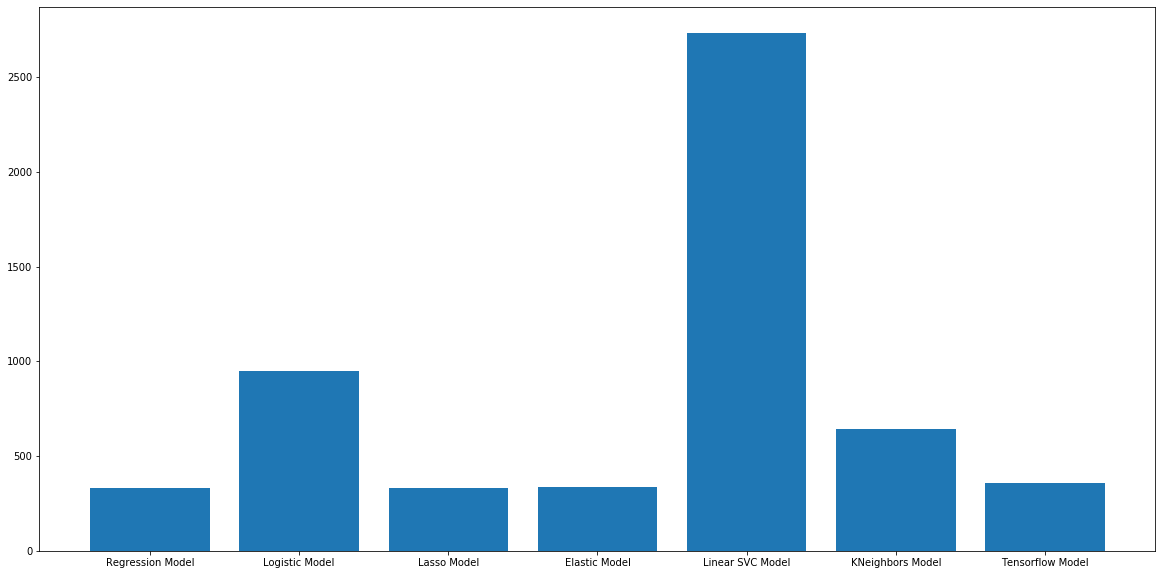

In [0]:
plt.figure(figsize=(20,10))
MSE_combined = [MSE_regression_Model, MSE_Logistic_Model, MSE_lasson_Model, MSE_elastic_Model, MSE_linearSVC_Model, MSE_KNeighborsModel_Model, MSE_Tensorflow_Model]
left = [1,2,3,4,5,6,7]
color = ['red', 'green', 'blue', 'black', '']
tickLabel = ['Regression Model', 'Logistic Model', 'Lasso Model', 'Elastic Model', 'Linear SVC Model', 'KNeighbors Model', 'Tensorflow Model']
plt.bar(left, MSE_combined, tick_label = tickLabel, width = 0.8)
plt.show()

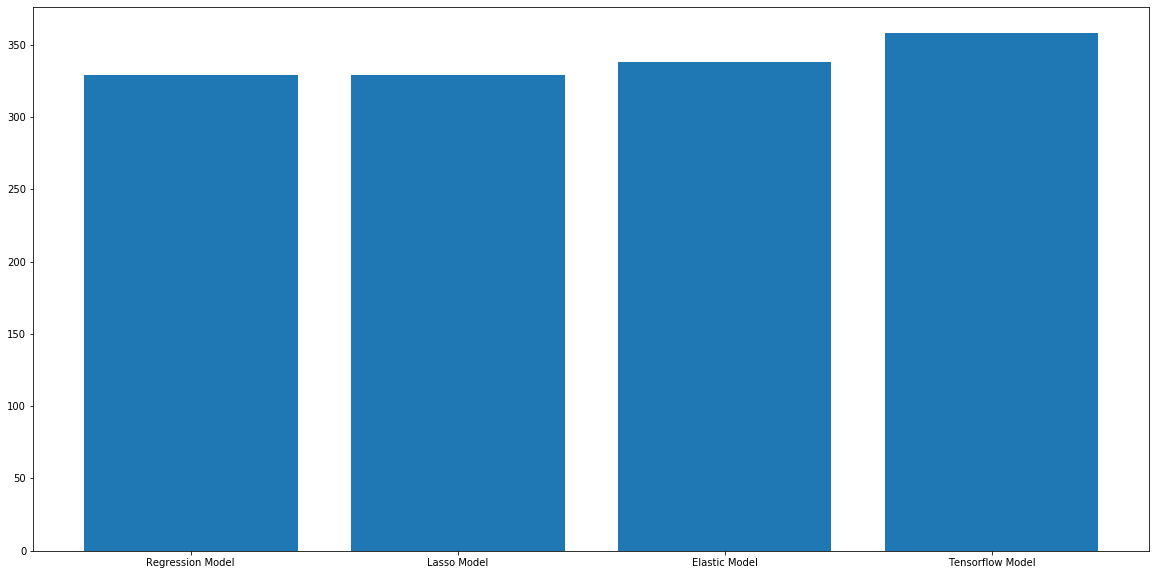

In [0]:
plt.figure(figsize=(20,10))
MSE_combined_top = [MSE_regression_Model, MSE_lasson_Model, MSE_elastic_Model, MSE_Tensorflow_Model]
left = [1,2,3,4]
color = ['red', 'green', 'blue', 'black']
tickLabel = ['Regression Model', 'Lasso Model', 'Elastic Model', 'Tensorflow Model']
plt.bar(left, MSE_combined_top, tick_label = tickLabel, width = 0.8)
plt.show()

In [0]:
regTestScore = regModel.score(testX, testY)
logModelScore = logModel.score(testX, testY)
ridgeModelScore = rr.score(testX, testY)
lassoModelScore = lassoModel.score(testX, testY)
elasticModelScore = elasticModel.score(testX, testY)
linearSVCModelScore = linearSVCModel.score(testX, testY)
KNeighborsModelScore = KNeighborsModel.score(testX, testY)
TensorflowDenseScore = 0.0230
TensorflowClassificationScore = 0.2659

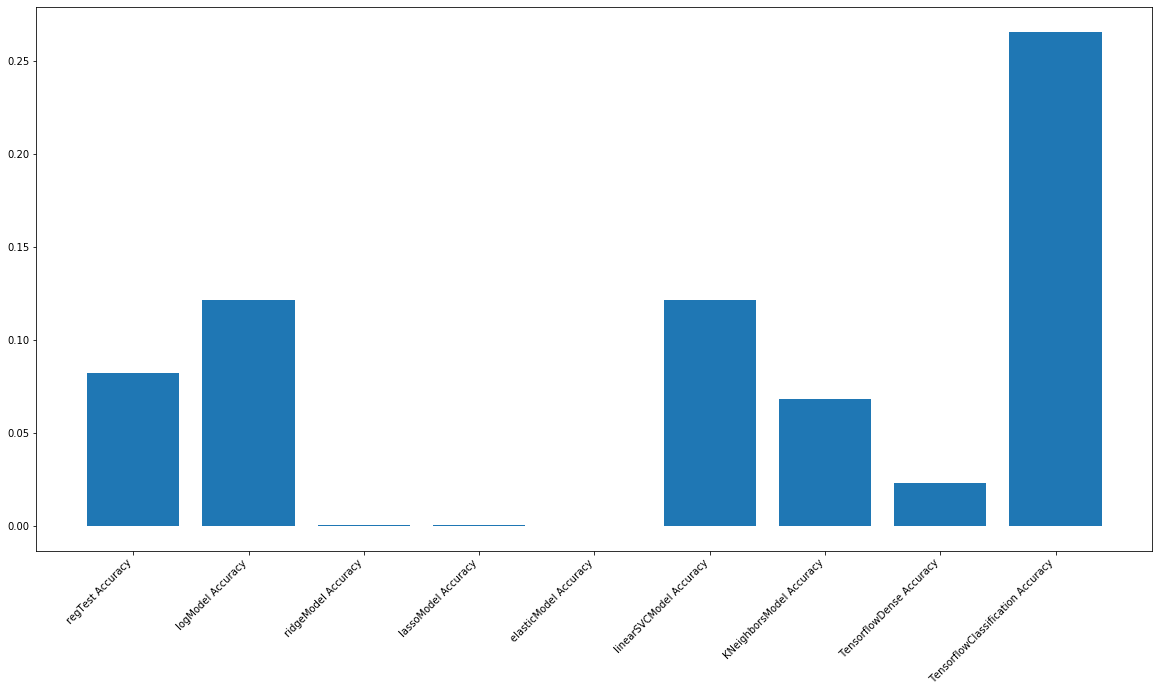

In [0]:
plt.figure(figsize=(20,10))
accuracyList = [regTestScore, logModelScore, ridgeModelScore, lassoModelScore, elasticModelScore, linearSVCModelScore, KNeighborsModelScore, TensorflowDenseScore, TensorflowClassificationScore]
left = [1,2,3,4,5,6,7,8,9]
tickLabel = ['Regression Model Accuracy', 'Logistic Model Accuracy', 'Ridge Model Accuracy', 'Lasso Model Accuracy', 'Elastic Model Accuracy', 'Linear SVC Model Accuracy', 'KNeighbors Model Accuracy', 'Tensorflow Dense Accuracy', 'Tensorflow Classification Accuracy']
plt.bar(left, accuracyList, tick_label = tickLabel, width = 0.8,)
plt.xticks(rotation=45, ha='right')
plt.show()

We are going to check if there is a difference between Logsitic Model Accuracy and Linear SVC Model accuracy eventhough Tensorflow Classification Model will scored the highest.

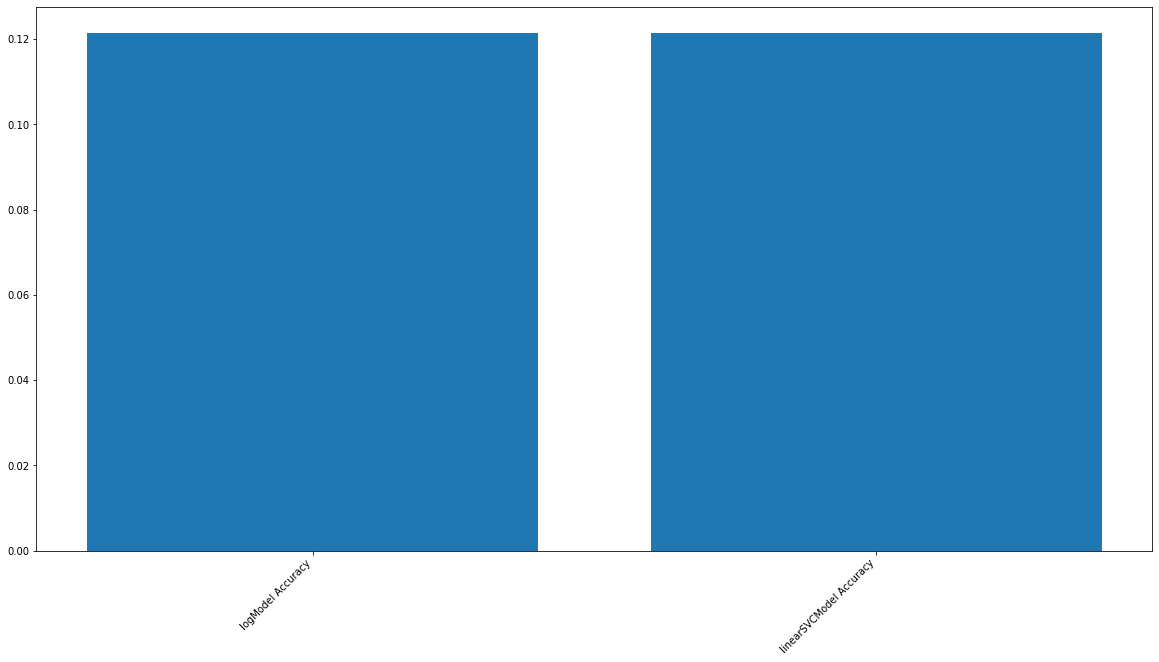

In [0]:
plt.figure(figsize=(20,10))
accuracyList = [logModelScore, linearSVCModelScore]
left = [1,2]
tickLabel = ['Logistic Model Accuracy', 'Linear SVC Model Accuracy']
plt.bar(left, accuracyList, tick_label = tickLabel, width = 0.8,)
plt.xticks(rotation=45, ha='right')
plt.show()

### Popularity prediction model plot

We have found that that the **Linear Regression model** is the best model to predict Popularity. We will now perform a linear regression on each individual predictor to see which of them predicts popularity best.

We will not take Tensorflow model into consideration as it does not apply to proper accuracy values between 0 to 100 but 10 categories.

In [0]:
score = []
mse = []
mae =[]
rmse = []
r2 = []
from sklearn import metrics
predictors = ['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']
for i in predictors:
    data = df[[i]]
    target = df[['popularity']]
    trainX, testX, trainY, testY = train_test_split(data, target, train_size = 0.75, random_state = 1)
    regModel = linear_model.LinearRegression()
    regModel.fit(trainX, trainY)
    regModel.score(testX, testY)
    score.append(regModel.score(testX, testY))
    mse.append(metrics.mean_squared_error(testY, regModel.predict(testX)))
    mae.append(metrics.mean_absolute_error(testY, regModel.predict(testX)))
    rmse.append(np.sqrt(metrics.mean_squared_error(testY, regModel.predict(testX))))
    r2.append(metrics.r2_score(testY, regModel.predict(testX)))
print('Score: ' , score)
print("MSE: " , mse)
print("MAE: " , mae)
print("RMSE: " , rmse)
print("R2: " , r2)

Score:  [0.011503793228767822, 0.01765746840276816, 9.560961763632747e-06, 0.014792108314546136, 0.04566402232407951, -3.4802984094639555e-05, 0.0008141356844372227, 0.057344900938109844, 0.00010138819664351484, -5.051468074901422e-05, 0.0013885429737243715, 0.00352330096367226, 0.0005377559205933524]
MSE:  [354.63207334152986, 352.4243859769479, 358.7557345072425, 353.4523601684477, 342.3767780890963, 358.77165047939656, 358.467085951886, 338.1861558358508, 358.72279064517045, 358.7772871945626, 358.26101207264696, 357.4951480795717, 358.5662397250722]
MAE:  [15.440836720366521, 15.398999728790615, 15.570749444132819, 15.391266238863043, 15.186163035520416, 15.571058786530648, 15.568784976878852, 15.047025906554648, 15.569401040854276, 15.570919402828114, 15.552818352310432, 15.541582335163906, 15.561540623899745]
RMSE:  [18.8316773905441, 18.77296955670434, 18.94084830484745, 18.800328725010306, 18.503426117589584, 18.941268449589025, 18.93322703481596, 18.38983838525643, 18.93997863

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

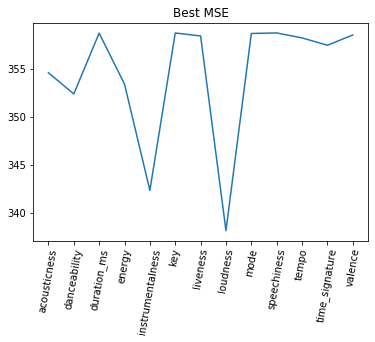

In [0]:
plt.figure(figsize=(10,10))
plt.plot(predictors,mse)
plt.title('Best MSE')
plt.xticks(rotation=80)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

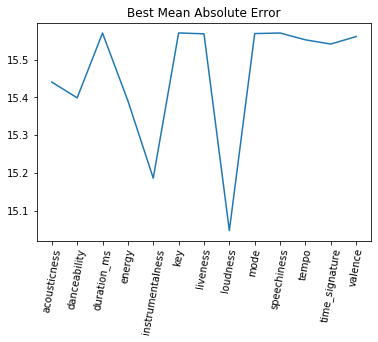

In [0]:
plt.figure(figsize=(10,10))
plt.plot(predictors,mae)
plt.title('Best Mean Absolute Error')
plt.xticks(rotation=80)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

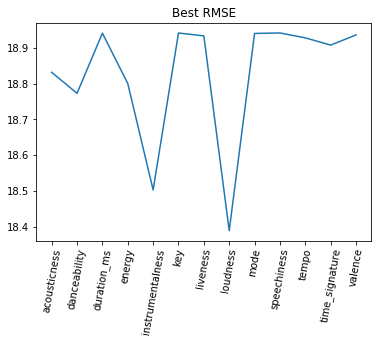

In [0]:
plt.figure(figsize=(10,10))
plt.plot(predictors,rmse)
plt.title('Best RMSE')
plt.xticks(rotation=80)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

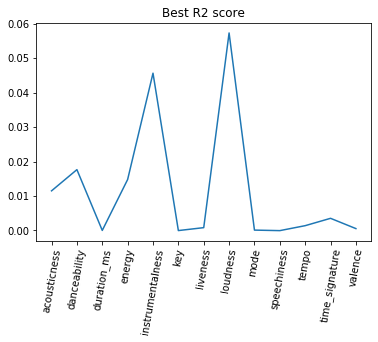

In [0]:
plt.figure(figsize=(10,10))
plt.plot(predictors,r2)
plt.title('Best R2 score')
plt.xticks(rotation=80)

## **Explanation**
* As we compare the plot predictors vs Popularity we can see a pattern that suggests that the plots with no discernable patterns have very poor MSE, R2 and score values.

* We continue to investigate which predictor has the best score to predict Popularity.

* As we can see, loudness is performing the best out of the 13 predictors and would be the best amongst acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, mode, speechiness, tempo, time_signature and valence.

* Although their accuracies are not ideal we can say that Loudness can be 5.7% accurate in predicting popularity.

* We can also say that music popularity is not largely affected by any of these predictors and may not be predictable according to our research.

# **Cross Validation**

## What is Cross Validation?
![alt text](https://miro.medium.com/max/1185/1*4G__SV580CxFj78o9yUXuQ.png)

After a model goes through training, it can overfit meaning that the model will memorize the training data and will only specialise in the training data and most likely not score a high accuracy on test data.

Therefore we cross validate through different sizes and shuffles of data. We can find the average accuracy using the method too.
![alt text](https://miro.medium.com/max/845/1*OoDfxcxpccB6tvZ2Hw0XzQ.png)

In [0]:
scores = []
def crossValidate(Model, Name, cv):
    data = df[list(df.columns.values)[3:16]]
    target = df[['popularity']]

    score = cross_val_score(Model, data, target, cv= cv)
    print('Accuracy : ', score.mean(), '+/-', score.std()*2)
    scores.append([Name, score]) 

In [0]:
for i in range(3,14):
    regModel = linear_model.LinearRegression()
    crossValidate(regModel, 'Regression Model', i)

Accyracy :  -0.0225881266596439 +/- 0.24970208877864822
Accyracy :  -0.02736686586717784 +/- 0.18407575254601627
Accyracy :  -0.21667112920200288 +/- 0.4449268704069788
Accyracy :  -0.28371220750529863 +/- 0.6324045517027603
Accyracy :  -0.19952470683384124 +/- 0.4009886824763919
Accyracy :  -0.30080211393442186 +/- 0.6383638783471931
Accyracy :  -0.21086778877867587 +/- 0.5393721979356679
Accyracy :  -0.27081452366788533 +/- 0.5704563843072435
Accyracy :  -0.3174200566299001 +/- 0.6685924743915795
Accyracy :  -0.31483653472348916 +/- 0.7036407321522841
Accyracy :  -0.36480206395328046 +/- 0.7132078058379443


# **Conclusion**

* From our investigation, we have found that the best predictors for popularity is loudness and instrumentalness.

* The best model we could fit was the Linear Regression model. However, as the R2 score of this model is low, the accuracy of predicting popularity will be poor. 

* The distribution of the predictor variables were not from a normal distribution (very skewed) and there was heteroscedasticity of error terms present which may have affected our model's ability to predict Popularity.

* We can conclude that popularity is difficult to predict.

* Popularity prediction using a categorical value will be better due to 100 possible answers to 10 possible categories

* Therefore we need more than these features to predict the popularity
